[IPython Notebook](hybrid_binary.ipynb) |  [Python Script](hybrid_binary.py)

Comparing Roche Distortion for Nbody vs Keplerian (Binary)
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

phoebe.devel_on()

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)
Tue, 21 Feb 2017 12:32 BUNDLE       INFO    setting 'freq@primary@component'=6.283185 rad / d from 'freq@constraint' constraint
Tue, 21 Feb 2017 12:32 BUNDLE       INFO    setting 'irrad_frac_lost_bol@primary@component'=0.4 from 'irrad_frac_lost_bol@constraint' constraint
Tue, 21 Feb 2017 12:32 BUNDLE       INFO    setting 'freq@secondary@component'=6.283185 rad / d from 'freq@secondary@constraint' constraint
Tue, 21 Feb 2017 12:32 BUNDLE       INFO    setting 'irrad_frac_lost_bol@secondary@component'=0.4 from 'irrad_frac_lost_bol@secondary@constraint' constraint
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    creating and attaching new parameter: asini
Tue, 21 Feb 2017 12:32 BUNDLE       INFO    setting 'asini@binary@component'=5.3 solRad from 'asini@constraint' constraint
Tue, 

Adding Datasets
----------------------

In [4]:
b.add_dataset('lc', times=np.linspace(0,1,101))

Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'enabled' parameter for {'dataset': 'lc01'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'lc_method' parameter for {'dataset': 'lc01'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'fti_method' parameter for {'dataset': 'lc01'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'fti_oversample' parameter for {'dataset': 'lc01'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'ld_func' parameter for {'component': 'primary'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'ld_func' parameter for {'component': 'secondary'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'ld_coeffs' parameter for {'component': 'primary'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'ld_coeffs' parameter for {'component': 'secondary'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'pblum_ref' parameter for {'component': 'primary'}
Tue, 21 Feb 2017 12:32 PARAMETERS   INFO    copying 'pblum_ref' parameter for {'component

<ParameterSet: 15 parameters | contexts: compute, dataset>

Running Compute
-----------------------

In [5]:
b.set_value_all('irrad_method', 'none')
b.set_value_all('ltte', True)

In [6]:
b.run_compute(dynamics_method='keplerian', distortion_method='roche', model='ph_kepl_roche')

Tue, 21 Feb 2017 12:32 BUNDLE       INFO    running phoebe backend to create 'ph_kepl_roche' model
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    initializing mesh for primary
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    covered surface with 1156 triangles
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    initializing mesh for secondary
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    covered surface with 1156 triangles
Tue, 21 Feb 2017 12:32 PASSBANDS    INFO    loading Johnson:V passband


<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [7]:
#b.run_compute(dynamics_method='nbody', distortion_method='rotstar', model='ph_dynam_rotstar')

In [8]:
b.run_compute(dynamics_method='nbody', distortion_method='roche', model='ph_dynam_roche')

Tue, 21 Feb 2017 12:32 BUNDLE       INFO    running phoebe backend to create 'ph_dynam_roche' model
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    initializing mesh for primary
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    covered surface with 1156 triangles
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    initializing mesh for secondary
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    covered surface with 1156 triangles
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    determining target volume at theta=1.57079632679
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    volume conservation: target_volume=0.0288136801501
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    reprojecting mesh onto Phi=6.28266205443 at d=0.999999600003
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    determining target volume at theta=4.71194176872
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    volume conservation: target_volume=0.0288136801501
Tue, 21 Feb 2017 12:32 UNIVERSE     INFO    reprojecting mesh onto Phi=6.28266205443 at d=0.999999600003
Tue,

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

Plotting
-------------------------

Tue, 21 Feb 2017 12:33 PARAMETERS   INFO    calling 'mpl' plotting backend for ph_kepl_roche@model
Tue, 21 Feb 2017 12:33 PARAMETERS   INFO    calling 'mpl' plotting backend for ph_dynam_roche@model


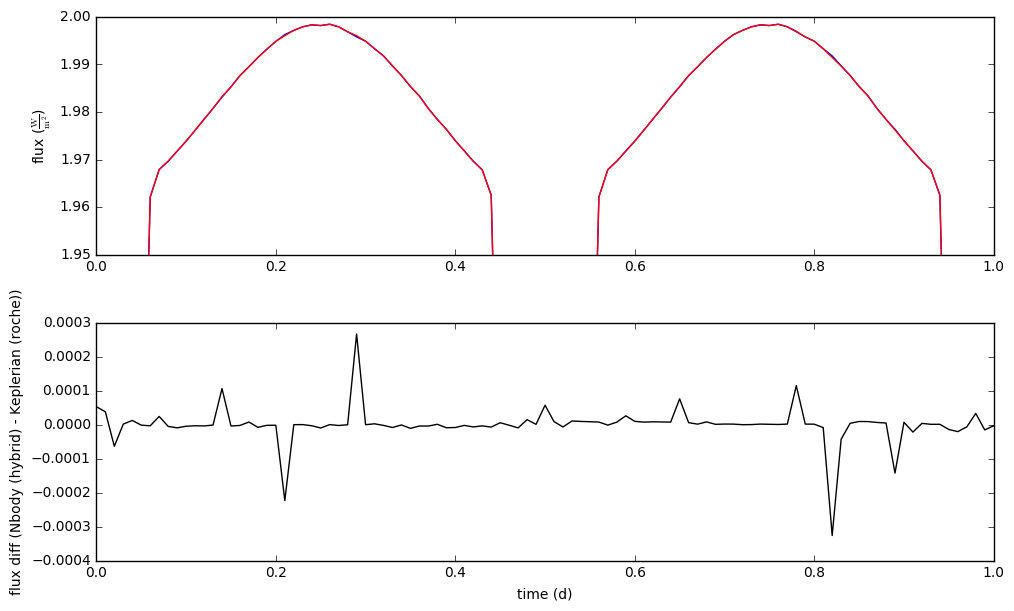

In [9]:
fig, axs = plt.subplots(2,1, figsize=(10,6))
#b.plot(model='ph_dynam_rotstar', color='g', ax=axs[0])
b.plot(model='ph_kepl_roche', color='b', ax=axs[0])
b.plot(model='ph_dynam_roche', color='r', ax=axs[0])
#axs[0].legend(loc=4)
ylim = axs[0].set_ylim(1.95,2.0)
xl = axs[0].set_xlabel('')

times = b.get_value('times@ph_dynam_roche')
flux_diff = b.get_value('fluxes@ph_dynam_roche') - b.get_value('fluxes@ph_kepl_roche')
axs[1].plot(times, flux_diff, 'k-')
yl = axs[1].set_ylabel('flux diff (Nbody (hybrid) - Keplerian (roche))')
xl = axs[1].set_xlabel('time (d)')